In [1]:
import os
import rawpy
import numpy as np

In [17]:
# Loads a raw image
def load_image(path):
    with rawpy.imread(path) as raw:
        image = raw.raw_image.copy() # returns a 2D ndarray array, grey scale
        image_rgb = raw.postprocess() # returns a 3D ndarray array, rgb channels
        return image

Bayer raw image: https://en.wikipedia.org/wiki/Bayer_filter

In [20]:
image = load_image('test_data/payload_N000.dng')
image

array([[146, 147, 148, ..., 150, 159, 152],
       [151,  91, 146, ...,  99, 155,  99],
       [151, 144, 152, ..., 164, 155, 163],
       ...,
       [205, 120, 221, ..., 115, 192, 111],
       [211, 219, 213, ..., 190, 191, 192],
       [224, 123, 212, ..., 109, 190, 109]], dtype=uint16)

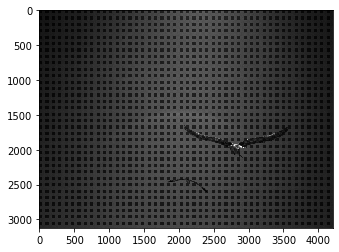

In [22]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray',interpolation='none')

In [ ]:
# Loads a burst
def load_burst(path):
    # Get the file list in the path
    file_list = os.listdir(path)
    # Remove the .DS_Store file on MacOS
    for item in file_list:
        if item.startswith('.') and os.path.isfile(os.path.join(path, item)):
            file_list.remove(item)
    # Load the images
    images = []
    for item in file_list:
        images.append(load_image(f'test_data/{item}'))
    return images

In [ ]:
load_burst('test_data/')